In [31]:
import pandas as pd

df = pd.read_csv('cleaned train_identity.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [32]:
len(df)

15282

In [33]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from patsy import dmatrices

In [34]:
df.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,...,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3256028,-5.0,288020.0,0.0,0.0,100.000000,1,34,1,1,...,1,1,48,0,0,1,0,0,1431,0
1,3572927,-5.0,1315.0,0.0,0.0,100.000000,1,34,0,0,...,0,0,70,1,0,1,1,0,1431,0
2,3492797,-5.0,290487.0,2.0,-5.0,95.080002,1,34,1,1,...,0,0,80,0,0,1,0,0,1431,0
3,3083982,-5.0,277642.0,0.0,0.0,100.000000,1,34,0,0,...,0,0,45,0,0,1,1,0,1431,0
4,3078243,-10.0,53657.0,0.0,-10.0,100.000000,1,43,1,1,...,1,1,89,1,0,0,1,0,1397,0


In [35]:
df.columns.values

array(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11',
       'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20',
       'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'isFraud'], dtype=object)

In [36]:
df_binary = pd.read_csv('excluded_cols_binary.csv')
df2 = pd.merge(df,df_binary.drop('Unnamed: 0',axis=1), how = 'left', on = 'TransactionID')
X = df2.drop(['isFraud', 'TransactionID'], axis=1)

y = df2['isFraud']
#X, y = dmatrices( )

In [37]:
#len(df['isFraud']) #15282

In [38]:
# Fit Random Forest model
model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 0)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
# Predict and print confusion matrix
y_pred = model.predict(X)

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

print(confusion_matrix(y,y_pred))
print('Accuracy', metrics.accuracy_score(y,y_pred))

[[6193 1448]
 [1485 6156]]
Accuracy 0.8080748593116084


In [40]:
# Calculate the FPR and TPR for all thresholds of the classification
y_pred_proba = model.predict_proba(X)[::,1]

fpr, tpr, threshold = metrics.roc_curve(y, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

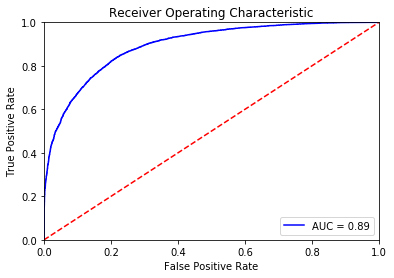

In [41]:
# Plot ROC curve
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
# Create a more balanced dataset and fit Random Forest again
#QUESTION: predict on test
# 'identity_test' is the VALDIATION set made from train set
df_test1 = pd.read_csv('identity_cv.csv').drop('Unnamed: 0', axis=1) 
mask = df_test['isFraud'] == 1
df_test = pd.merge(df_test1,df_binary.drop('Unnamed: 0', axis=1), how = 'left', on = 'TransactionID')
df_test_noFraud = df_test[-mask].sample(n = 15282) #15282 is the length of df['isFraud']


#df_test_noFraud = df_test_noFraud.drop(['isFraud', 'TransactionID'])

df_test_fraud = df_test[mask]

df_test_balanced = pd.concat([df_test_noFraud, df_test_fraud])

X_test = df_test_balanced.drop(['isFraud','isFraud_x','isFraud_y','TransactionID'], axis=1)
#print(X_test.columns.values)
y_test = df_test_balanced['isFraud']

#model.fit(X_test,y_test)
y_test_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', metrics.accuracy_score(y_test,y_test_pred)) #almost no improvement in accuracy

[[11700  3582]
 [ 1485  6156]]
Accuracy 0.778955634079309


In [43]:
#len(mask) #97614

In [44]:
#len(df_test_balanced) #22923

In [45]:
df_test1 = pd.read_csv('identity_cv.csv').drop('Unnamed: 0', axis=1)
#print(df_binary.head())
df_test = pd.merge(df_test1,df_binary.drop('Unnamed: 0', axis=1), how = 'left', on = 'TransactionID')
mask = df_test['isFraud'] == 1
df_test_noFraud = df_test[-mask]
#df_test_noFraud = df_test_noFraud.drop(['isFraud', 'TransactionID'])

df_test_fraud = df_test[mask]


df_test_balanced = pd.concat([df_test_noFraud, df_test_fraud])

X_test = df_test_balanced.drop(['isFraud','isFraud_x', 'isFraud_y','TransactionID'], axis=1)
y_test = df_test_balanced['isFraud']


y_test_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', metrics.accuracy_score(y_test,y_test_pred))

[[69207 20766]
 [ 1485  6156]]
Accuracy 0.7720511402052984


In [46]:
len(df_test['isFraud'])

97614

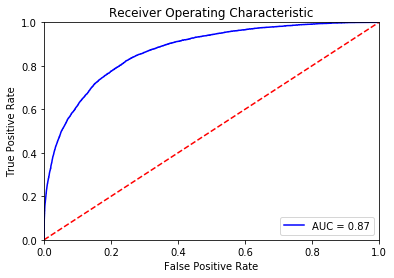

In [47]:
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 0, 'Relative Importance')

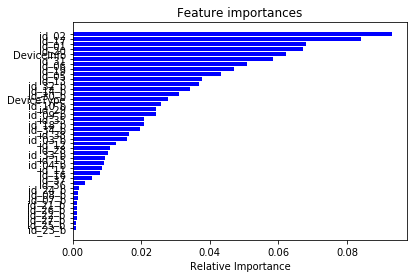

In [48]:
import numpy as np

features = X_test.columns.values
importances = model.feature_importances_

indices = np.argsort(importances)
plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')


In [49]:
X_cut = X.drop(['id_16', 'id_17', 'id_29', 'id_28', 'id_31'], axis=1)


#X = X_cut.drop(['isFraud', 'TransactionID'], axis=1)
y = df['isFraud']

#X, y = dmatrices( )

model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 0)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
df_test1 = pd.read_csv('identity_cv.csv').drop('Unnamed: 0', axis=1)
df_test = pd.merge(df_test1,df_binary.drop('Unnamed: 0', axis=1), how = 'left', on = 'TransactionID')
mask = df_test['isFraud'] == 1
df_test_noFraud = df_test[-mask].sample(n = 15282)
#df_test_noFraud = df_test_noFraud.drop(['isFraud', 'TransactionID'])

df_test_fraud = df_test[mask]


df_test_balanced = pd.concat([df_test_noFraud, df_test_fraud])

X_test = df_test_balanced.drop(['isFraud','isFraud_x','isFraud_y', 'TransactionID'], axis=1)
#X_test = X_test.drop(['id_16', 'id_17', 'id_29', 'id_28', 'id_31'], axis=1)
y_test = df_test_balanced['isFraud']


y_test_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_test_pred))
print('Accuracy', metrics.accuracy_score(y_test,y_test_pred))
print('f1', metrics.f1_score(y_test,y_test_pred))

#Naive bayes code?
#from sklearn import datasets
#iris = datasets.load_iris()
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)


#Naive bayes code?
#from sklearn import datasets
#iris = datasets.load_iris()
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)

[[11808  3474]
 [ 1485  6156]]
Accuracy 0.7836670592854339
f1 0.7128712871287128


In [52]:
#Try logistic regression for variable importance

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, penalty = 'l1').fit(X, y)
X_test = df_test_balanced.drop(['isFraud','isFraud_x','isFraud_y', 'TransactionID'], axis=1)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy', metrics.accuracy_score(y_test,y_pred))


C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[10811  4471]
 [ 2410  5231]]
Accuracy 0.6998211403393971


In [53]:

weights = pd.Series(clf.coef_[0],
                 index=X.columns.values)
weights.sort_values()

id_35        -1.255420e+00
id_33_b      -1.123481e+00
id_36        -7.989844e-01
id_09_b      -6.481077e-01
id_10_b      -6.309412e-01
id_04_b      -5.237237e-01
id_29        -3.752067e-01
id_18_b      -2.063111e-01
id_16        -1.804067e-01
id_03_b      -1.449832e-01
id_37        -1.172670e-01
id_01        -1.867504e-02
id_13        -8.250239e-03
id_11        -2.495718e-03
id_19        -4.140684e-04
id_31        -1.421019e-05
id_25_b       0.000000e+00
id_02         9.253930e-08
DeviceInfo    5.383326e-04
id_06         6.926701e-04
id_38         1.126752e-03
id_20         1.422869e-03
id_22_b       8.101283e-03
id_17         9.523445e-03
id_34_b       1.255391e-02
id_05         1.327087e-02
id_23_b       1.726876e-02
id_27_b       2.315113e-02
id_14_b       4.304285e-02
id_26_b       4.582734e-02
id_08_b       6.678865e-02
id_21_b       8.740264e-02
id_12         9.458273e-02
id_07_b       1.022921e-01
id_24_b       1.062873e-01
id_30_b       1.136386e-01
id_32_b       3.999830e-01
i

In [54]:
from random import sample
ratios = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
df = pd.read_csv('train_identity.csv')

model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 0)
for ratio in ratios:
    mask = df['isFraud'] == 1
    ident_RAW_Fraud = df[mask] #length: 7641
    ident_RAW = ident_RAW_Fraud.sample(n = int(ratio * len(df[mask])))
    ident_RAW_Non = df[-mask]

    ident_RAW_NonFraud = ident_RAW_Non.sample(n = int((1-ratio)*len(df[mask])))

    df_train_balanced = pd.concat([ident_RAW_NonFraud, ident_RAW_Fraud])
    X_tr = df_train_balanced.drop(['isFraud', 'TransactionID'], axis=1)
    y_tr = df_train_balanced['isFraud']
    model.fit(X_tr, y_tr)
    
    df_cv = df.sample(n = 10000)
    X_test = df_cv.drop(['isFraud', 'TransactionID'], axis = 1)
    y_test = df_cv['isFraud']
    y_pred = model.predict(X_test)
    print('Split:',1-ratio,'Accuracy:', metrics.accuracy_score(y_test,y_pred))
    



Split: 0.95 Accuracy: 0.7794
Split: 0.9 Accuracy: 0.7595
Split: 0.85 Accuracy: 0.7376
Split: 0.8 Accuracy: 0.7336
Split: 0.75 Accuracy: 0.7082
Split: 0.7 Accuracy: 0.6896
Split: 0.6 Accuracy: 0.6455
Split: 0.5 Accuracy: 0.5941


### LDA with correlated variables

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(21, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Text(0.5, 1.0, 'Is Not Fraud')

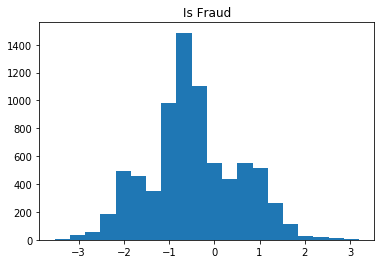

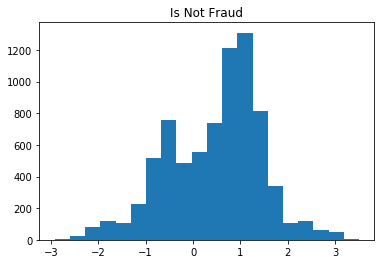

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('cleaned train_identity.csv')
df = df.drop('Unnamed: 0', axis = 1)
X = df.drop(['isFraud','TransactionID'], axis=1)
#X_cut_subset = df[['id_01', 'id_02','DeviceInfo', 'id_20', 'id_35', 'id_06', 'id_19', 'id_05',\
#                     'id_13']]
X_cut_subset = X
y = df['isFraud']

lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit(X_cut_subset,y).transform(X_cut_subset)


plt.figure()

plt.hist(X_r[y == 0, 0], label = 'isFraud',  bins = 20)
plt.title('Is Fraud')
plt.figure()
plt.hist(X_r[y == 1, 0], label = 'isNotFraud', bins = 20)
plt.title('Is Not Fraud')


### LDA without correlated variables

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Text(0.5, 1.0, 'Is Not Fraud')

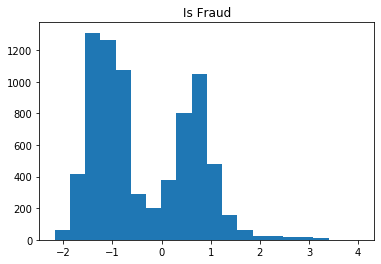

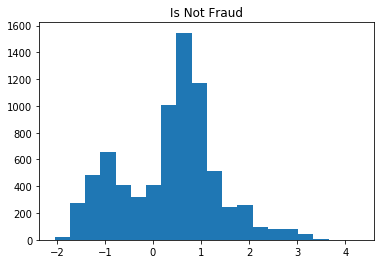

In [56]:

df = pd.read_csv('cleaned train_identity.csv')
df = df.drop('Unnamed: 0', axis = 1)
X = df.drop(['isFraud','TransactionID'], axis=1)
X_cut_subset = df[['id_01', 'id_02','DeviceInfo', 'id_20', 'id_35', 'id_06', 'id_19', 'id_05',\
                     'id_13']]
y = df['isFraud']

lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit(X_cut_subset,y).transform(X_cut_subset)


plt.figure()

plt.hist(X_r[y == 0, 0], label = 'isFraud',  bins = 20)
plt.title('Is Fraud')
plt.figure()
plt.hist(X_r[y == 1, 0], label = 'isNotFraud', bins = 20)
plt.title('Is Not Fraud')